<a href="https://colab.research.google.com/github/Mostofa-Najmus-Sakib/ML-works/blob/main/Assisgnment2/CS534_ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Question1: Implement  the  fit  and  predict  procedures  for  the  logistic  regression  (scikit  is  not  allowed)  with  norm  2 regularization function (and Lambda parameter). Use as the input parameters of the gradient ascent the maximum number of iterations (just a constant e.g. 100) and the learning factor (e.g. 0.01).

Let's define some necessary functions

In [ ]:
#This function calculates the sigmoid function, by the formula: h(x) = 1 / (1 + e^(-w.T*x)) => h(x) = 1 / (1 + e^(-z))
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# this function is used to initialize the parameter vector(w) to zero with dimension: No_of_features * 1
def initialize_with_zeros(dimension):
    w = np.zeros((dimension,1))
    return w

In [ ]:
# This function returns the sum of squares of the values in the vector w.
# We need this during calculating the loss with norm 2 regularization
def GetSumOfSquares(w):
    result = 0
    for i in range(0, len(w)):
        result = result + w[i] * w[i]
    return result
# This function returns the sum of the values in the vector w.
# We need this during calculating the gradient with norm 2 regularization
def GetSum(w):
    result = 0
    for i in range(0, len(w)):
        result = result + w[i]
    return result
# Calculates the loss or cost by the equation: sum(yi*log(h(xi)) + (1-yi)*log(1-h(xi)))
def calculateLoss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [ ]:
# w = parameters, X = the independant variables, Y = outputs
# Calculates the sigmoid and loss/cost
def CalculateSigmoidAndLoss(w, X, Y, lambdaValue):
    
    z = np.dot(X, w)
    h = sigmoid(z)
    
    loss = calculateLoss(h, Y) - lambdaValue * GetSumOfSquares(w)
    
    return h, loss

In [ ]:
# This is the implementation of the fit function for logistic regression
# it used norm 2 regularization as required by the question
# it takes as parameters, the independant variables(X), the outputs(Y), the lambdaValue
# maximum iteration is 100 and learning factor is 0.01 unless mentioned otherwise
def fit(X, Y, lambdaValue, maxItter = 100, learning_factor = 0.01):
    
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)    # this handles the bias term b by adding an extra column filled with 1
    
    w = initialize_with_zeros(X.shape[1])    # initially the parameters are all zero
    
    for i in range(0, maxItter):
        h, loss = CalculateSigmoidAndLoss(w, X, Y, lambdaValue)
        gradient = np.dot(X.T, (h - Y)) / Y.size + (GetSum(w)*lambdaValue/Y.size)    # calculate the gradient by the formula: sum(h(xi) - yi)/m + lambda*w/m
        w -= learning_factor * gradient    # adjust the parameters
    
    return w

In [ ]:
# This is the predict function of the logistic regression
# W = parameters that has been fit, X = the test data
# returns a series containing the predictions
def predict(W, X):
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    predictedOutput = sigmoid(np.dot(X, W))
    return predictedOutput

## Question2: Using the  iris dataset  (the  binary  class,Iris  Setosa  vs  others), K-fold  cross  validation,  metrics(accuracy, precision,  recall,  F1-score)  and logistic  regression  (Question1)  with  L2  regularization,estimate  the  best parameter C(the inverse of lambda).

Let's load the iris dataset

In [ ]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data = pd.concat([data, data])    #since the dataset is quite small

data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Since we are dealing with binary class(Iris Setosa vs others), we can use the following function to get our target column

In [ ]:
def GetBinaryTarget(data):
    target = []
    
    for i in range(0, len(data)):
        if data.iloc[i]['class'] == 'Iris-setosa':
            target.append(0)
        else:
            target.append(1)
    data.insert(len(data.columns), "target", target, True)
    return data

In [ ]:
data = GetBinaryTarget(data)
data

,sepal length,sepal width,petal length,petal width,class,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


For our example, let's work with sepal length and sepal width only

In [ ]:
data = data.drop(['petal length', 'petal width', 'class'], 1)
data.head()

,sepal length,sepal width,target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


Now we have the appropriate data, let's preprocess the data first

shuffling the data:

In [ ]:
data = data.sample(frac=1, random_state = 1)
data = data.reset_index(drop=True)
data.head()

,sepal length,sepal width,target
0,5.1,3.4,0
1,6.3,2.7,1
2,5.0,3.2,0
3,6.1,2.9,1
4,4.9,2.5,1


Splitting the independant and dependant variables:

In [ ]:
dataX = data[['sepal length', 'sepal width']].copy()
dataX.head()

,sepal length,sepal width
0,5.1,3.4
1,6.3,2.7
2,5.0,3.2
3,6.1,2.9
4,4.9,2.5


In [ ]:
dataY = data[['target']].copy()
dataY.head()

,target
0,0
1,1
2,0
3,1
4,1


In order to use the logistic regression functions and test them, we still need some more functions. Let's define those

In [ ]:
# After the fit and predict do their job of giving us a probabilistic output,
#  we need to use a threshold to get the real binary prediction values
# This function takes in the predictions and a threshold to calculate the real predictions
def realPred(pred, threshold):
    target = []
    for i in range(0, len(pred)):
        if pred[i] > threshold:
            target.append(1)
        else:
            target.append(0)
    return target

In [ ]:
# this function finds the best threshold values for particular predictions
def getBestThreshold(actual, pred):
    tempThresh = 0.1
    acc = 0
    result = 0
    while tempThresh < 1.0:
        up = 0
        down = len(actual)
        realPredValuesForThresh = realPred(pred, tempThresh)
        for i in range(0, len(actual)):
            if actual.iloc[i]['target'] == realPredValuesForThresh[i]:
                up = up + 1
        
        tempAcc = up / down
        if tempAcc > acc:
            result = tempThresh
            acc = tempAcc
        tempThresh = tempThresh + 0.1
    return result

# this function calculates all the metrics mentioned in the question(accuracy, precision, recall, f1score)
def getMetrics(actual, pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    for i in range(0, len(pred)):
        if actual.iloc[i]['target'] == 1 and pred[i] == 1:
            TP = TP + 1
        elif actual.iloc[i]['target'] == 0 and pred[i] == 0:
            TN = TN + 1
        elif actual.iloc[i]['target'] == 0 and pred[i] == 1:
            FP = FP + 1
        elif actual.iloc[i]['target'] == 1 and pred[i] == 0:
            FN = FN + 1
    
    accuracy = (TP+TN) / (TP+TN+FP+FN)
    
    precision = None
    if TP+FP != 0:
        precision = TP / (TP+FP)
    
    recall = None
    if TP+FN != 0:
        recall = TP / (TP+FN)
    
    f1score = None
    if recall != None and precision != None:
        f1score = 2*precision*recall/(precision+recall)
    
    return accuracy, precision, recall, f1score

Now let's use K-fold cross validation to see how our logistic regression functions perform for different values of C(the inverse of lambda)

In [ ]:
from sklearn.model_selection import KFold

Since the dataset is somewhat small, let's go with k=5

This block of code will find the average metrics values(e.g. average accuracy, average precision) for some sample C values using the K-fold cross validation and store this information in the dataframe named "metricsByCValue"

In [ ]:
kf = KFold(n_splits=5, shuffle=False)
C = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]    # different C values

# we will create a dataframe called metricsByCValue which will contain all the metrics for different C values
metricsByCValue = pd.DataFrame(columns = ['C', 'avgAccuracy', 'avgPrecision', 'avgRecall', 'avgF1score'])

for index in range (0, len(C)):
    totalAccuracy, totalPrecision, totalRecall, totalf1score = 0, 0, 0, 0
    accuracyCounter, precisionCounter, recallCounter, f1scoreCounter = 0, 0, 0, 0
    for train_index, test_index in kf.split(dataX):

        dataTrainX, dataTestX, dataTrainY, dataTestY = dataX.iloc[train_index], dataX.iloc[test_index], dataY.iloc[train_index], dataY.iloc[test_index]
    
        lambdaVal = 1 / C[index]    # lambda = 1/C
        
        parameters = fit(dataTrainX, dataTrainY, lambdaVal)
        
        prediction = predict(parameters, dataTestX)
        
        thresh = getBestThreshold(dataTestY, prediction)
        realPrediction = realPred(prediction, thresh)
        
        accuracy, precision, recall, f1score = getMetrics(dataTestY, realPrediction)
        
        if accuracy != None:
            totalAccuracy = totalAccuracy + accuracy
            accuracyCounter = accuracyCounter + 1
        if precision != None:
            totalPrecision = totalPrecision + precision
            precisionCounter = precisionCounter + 1
        if recall != None:
            totalRecall = totalRecall + recall
            recallCounter = recallCounter + 1
        if f1score != None:
            totalf1score = totalf1score + f1score
            f1scoreCounter = f1scoreCounter + 1
        
    
    avgAccuracy = totalAccuracy / accuracyCounter
    avgPrecision = totalPrecision / precisionCounter
    avgRecall = totalRecall / recallCounter
    avgF1score = totalf1score / f1scoreCounter
    
    data = [(C[index], avgAccuracy, avgPrecision, avgRecall, avgF1score)]
    temp = pd.DataFrame(data, columns = ['C','avgAccuracy', 'avgPrecision', 'avgRecall', 'avgF1score'])
    metricsByCValue = pd.concat([metricsByCValue, temp])

now let's see what kind of result we have got:

In [ ]:
metricsByCValue

,C,avgAccuracy,avgPrecision,avgRecall,avgF1score
0,100000,0.820000,0.949153,0.806650,0.856691
0,10000,0.820000,0.949153,0.806650,0.856691
0,1000,0.820000,0.949153,0.806650,0.856691
0,100,0.820000,0.949153,0.806650,0.856691
0,10,0.820000,0.949153,0.806650,0.856691
0,1,0.820000,0.949153,0.806650,0.856691
0,0.1,0.806667,0.949153,0.787138,0.842491
0,0.01,0.790000,0.888391,0.849548,0.844092
0,0.001,0.853333,0.949153,0.855796,0.889833
0,0.0001,0.913333,1.000000,0.875005,0.932071


Let's plot this and see how this looks

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


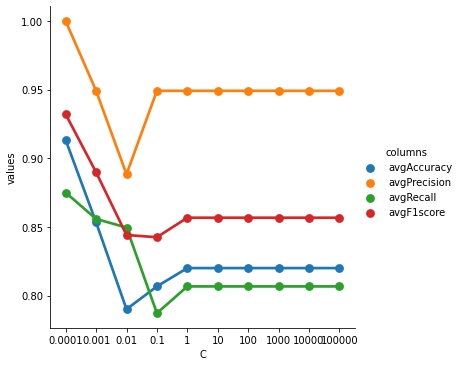

In [ ]:
df = metricsByCValue.melt('C', var_name='columns',  value_name='values')
g = sns.factorplot(x="C", y="values", hue='columns', data=df)

#### For all the C values we have tried so far in our example, it looks like mostly all the metrics see an increase for lower values of C. Therefore we can conclude that smaller values in our example are better for our logistic regression. In case of our example, the value 0.0001 is the best value.